## 머신러닝
- 주어진 데이터를 통해 컴퓨터가 학습하여 규칙을 찾는 것
- 알고리즘
    - 데이터의 분류 방향에 따라 각각의 차이점에 대한 정량적 변화 제시
    
### Decision Tree

#### 데이터 분할 기준(Split Criterion)
- 정보 획득(Information Grain)
    $I(x) = log_2{1\over p(x)}$
- 엔트로피(Entropy)
    - 얼만큼의 정보를 담고 있는가? 무질서도, 불확실성을 나타냄
    - $Entropy = \Sigma_{k=1}^{m} - p_i log_2p_i$
    - 값이 작을수록 순도가 높은 데이터(잘 분류됨)
- 지니계수
    - $Gini = \Sigma_{k=1}^{d} R_i \{1 - \Sigma_{k=1}^{m} p_{ik}^2\}$
    
#### scikit- learn을 이용한 의사결정 나무의 구현
```python
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth, random_state)
iris_tree.fit(iris.data, iris.target)
```

#### Accuray 확인
```python
from sklearn.metrics import accuracy_score

y_pred_train = iris_tree.predict(iris.data)
accuracy_score(iris.target, y_pred_train)
```

#### 모델 시각화
```python
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(iris_tree, feature_names=['length', 'width'], class_names=iris.target_names, rounded=True, filled=True))     
```

#### mlxtend - 모델 분류 결정경계 시각화
```python
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14, 8))
plot_decision_regions(X=iris.data, y=iris.target, clf=iris_tree, legend=2)
plt.show()
```

#### 결과 살펴보기
    - Accuracy가 높으면, 과적합이 됐을 가능성이 있다
    - 경계면이 올바른가?
    - 이 결과를 일반화된 데이터에 적용할 수 있을까?
    - 경계면이 복잡하면 모델의 성능이 나빠질 수 있다
---

### 지도학습
- 학습 대상이 되는 데이터에 정답(label)을 붙여서 학습 시켜 모델을 얻은 후 완전히 새로운 데이터에 적용시켜 <답>을 얻고자 하는 것 

#### 데이터의 분리
- 훈련(training)
- 검증(validation)
- 평가(test)

```python
from sklearn.model_selection import train_test_split

features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=1)
```
- 8:2의 비율로 train 데이터와 test 데이터를 분리
- `stratify=labels` : labels를 균일하게 나눠줌

-> DecisionTree 생성 -> Accuracy 확인 -> 모델 확인(graphviz)

### iris 데이터로 실습

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### 데이터 분리(petal length, petal width 열만 사용) 

In [3]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=15)

In [4]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

In [5]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=15)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

train data

In [6]:
from sklearn.metrics import accuracy_score

y_pred_train = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.975

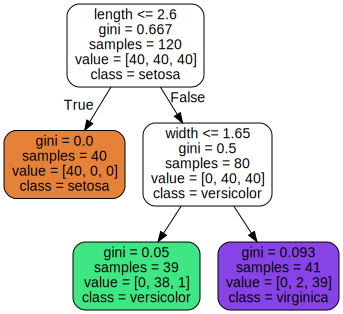

In [7]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(iris_tree, feature_names=['length', 'width'], class_names=iris.target_names, rounded=True, filled=True))     

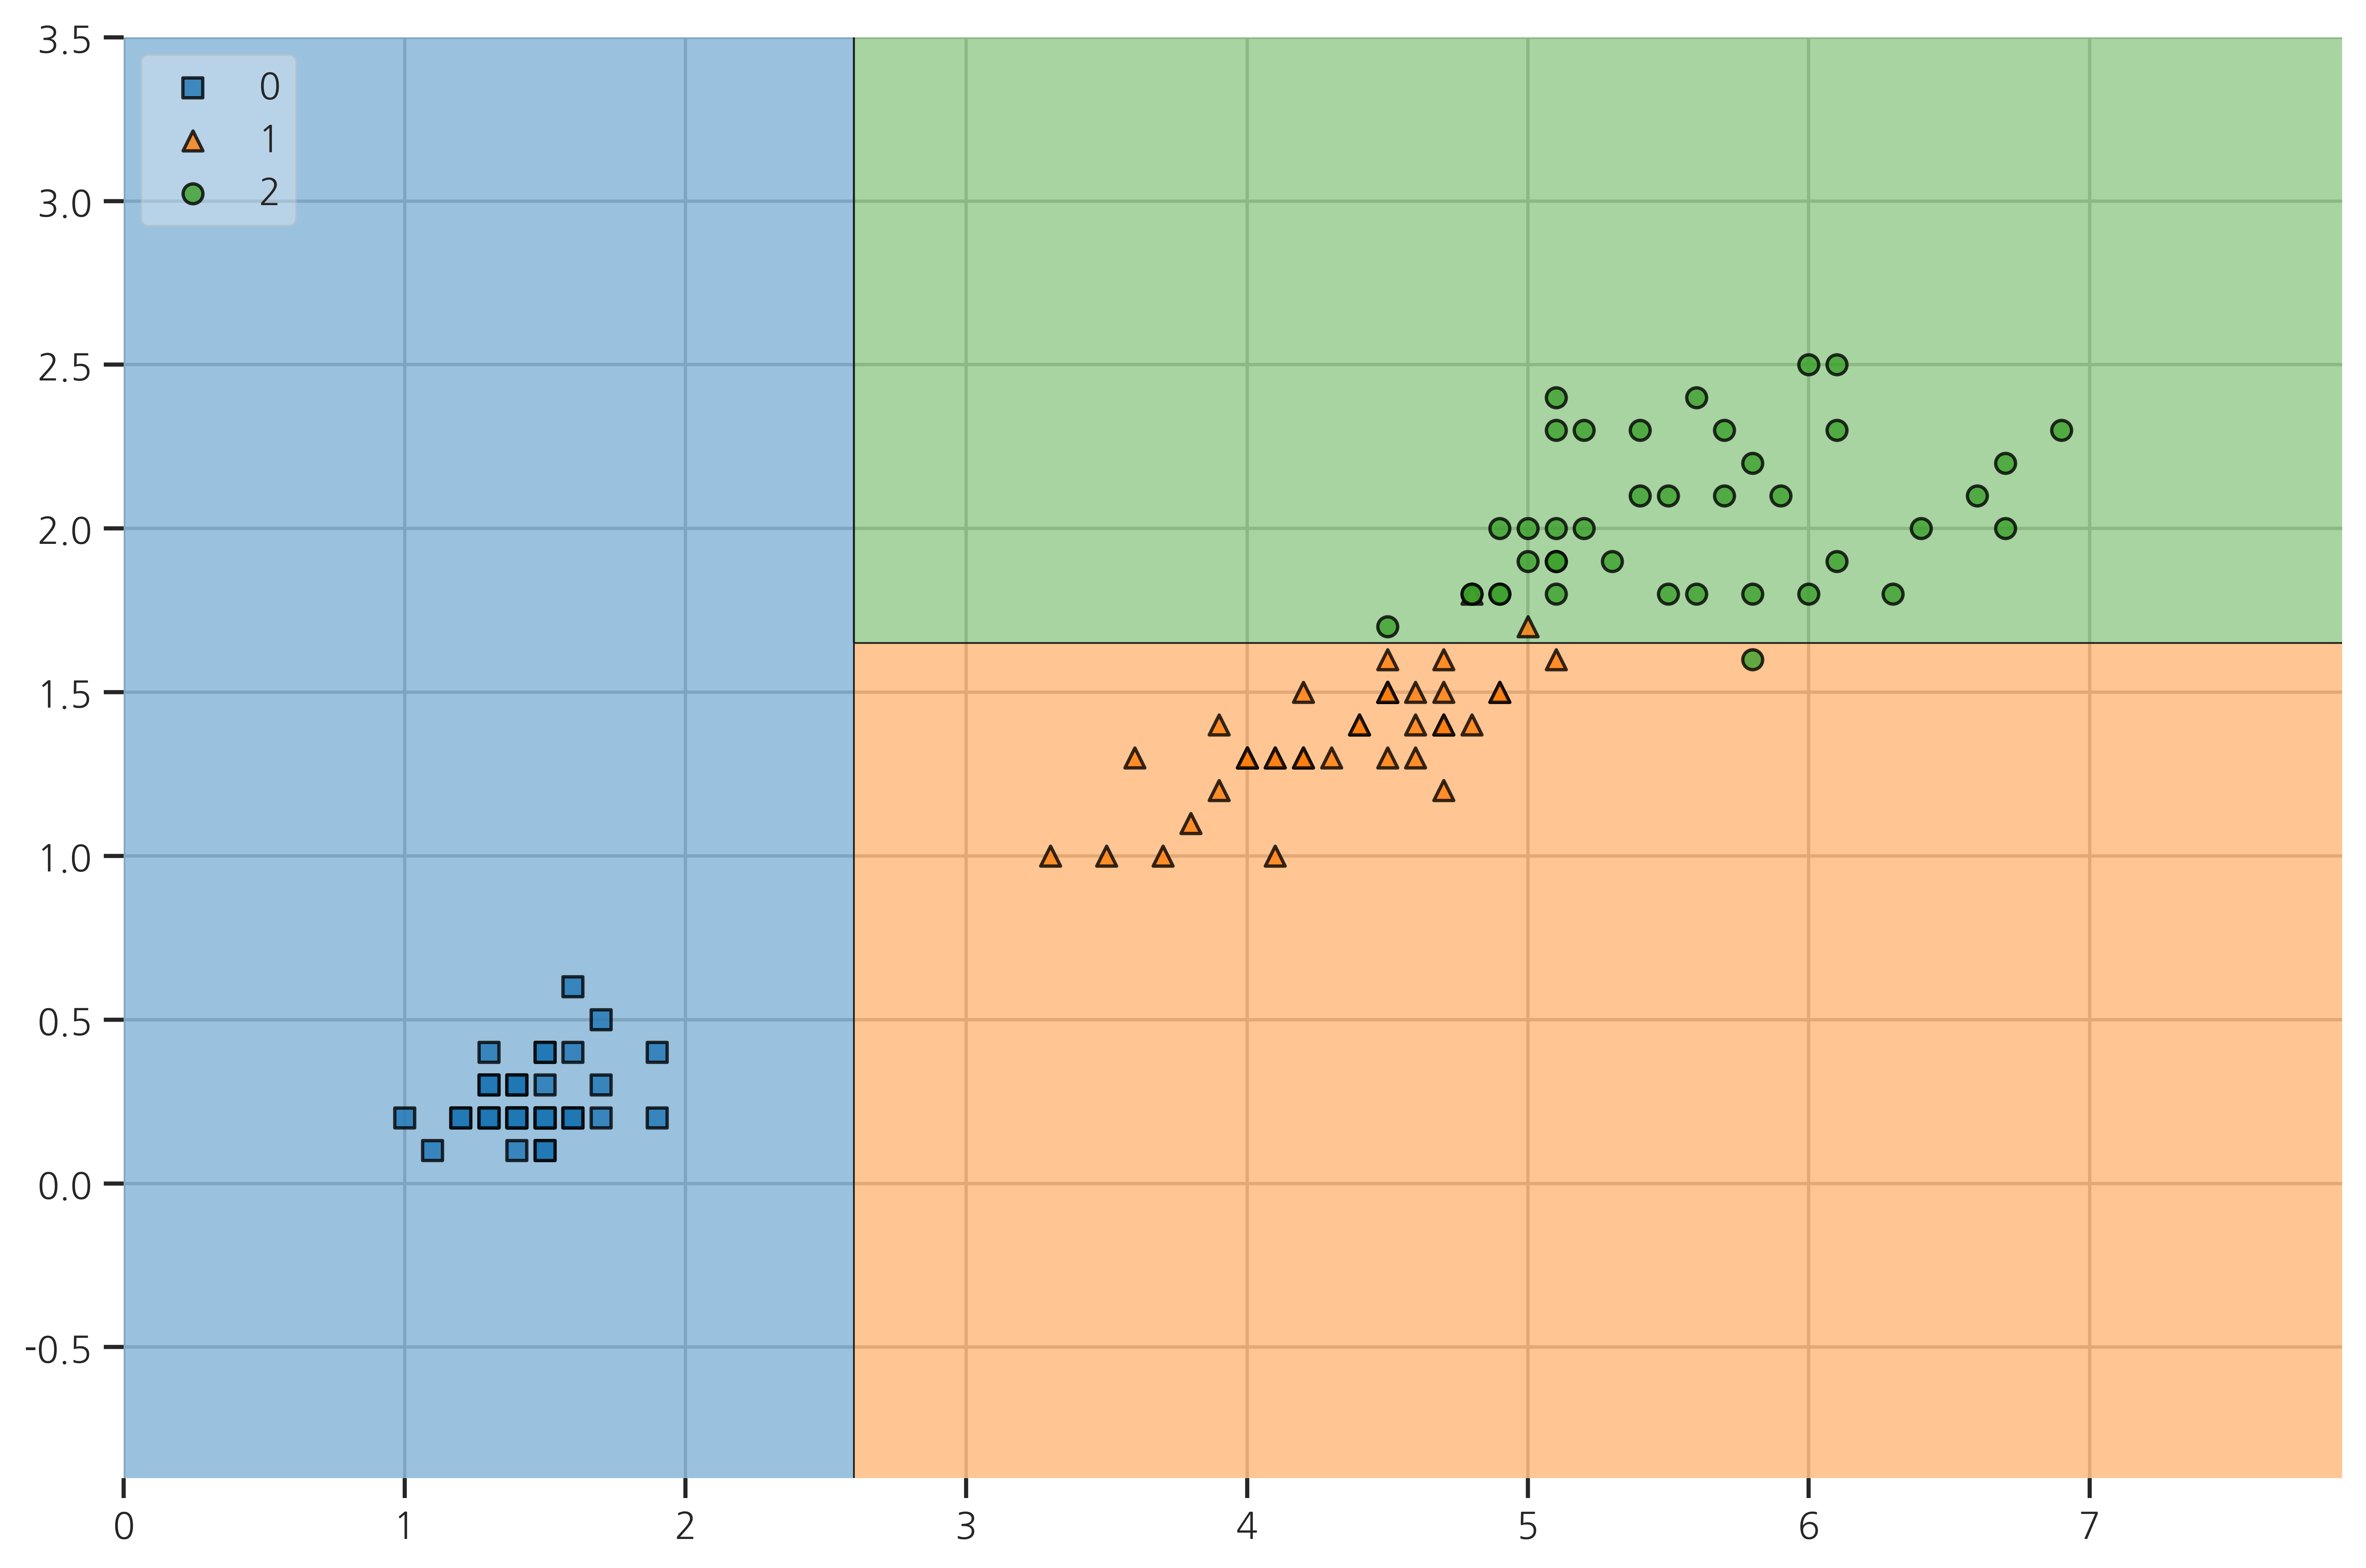

In [8]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12,8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show()

test data

In [9]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9

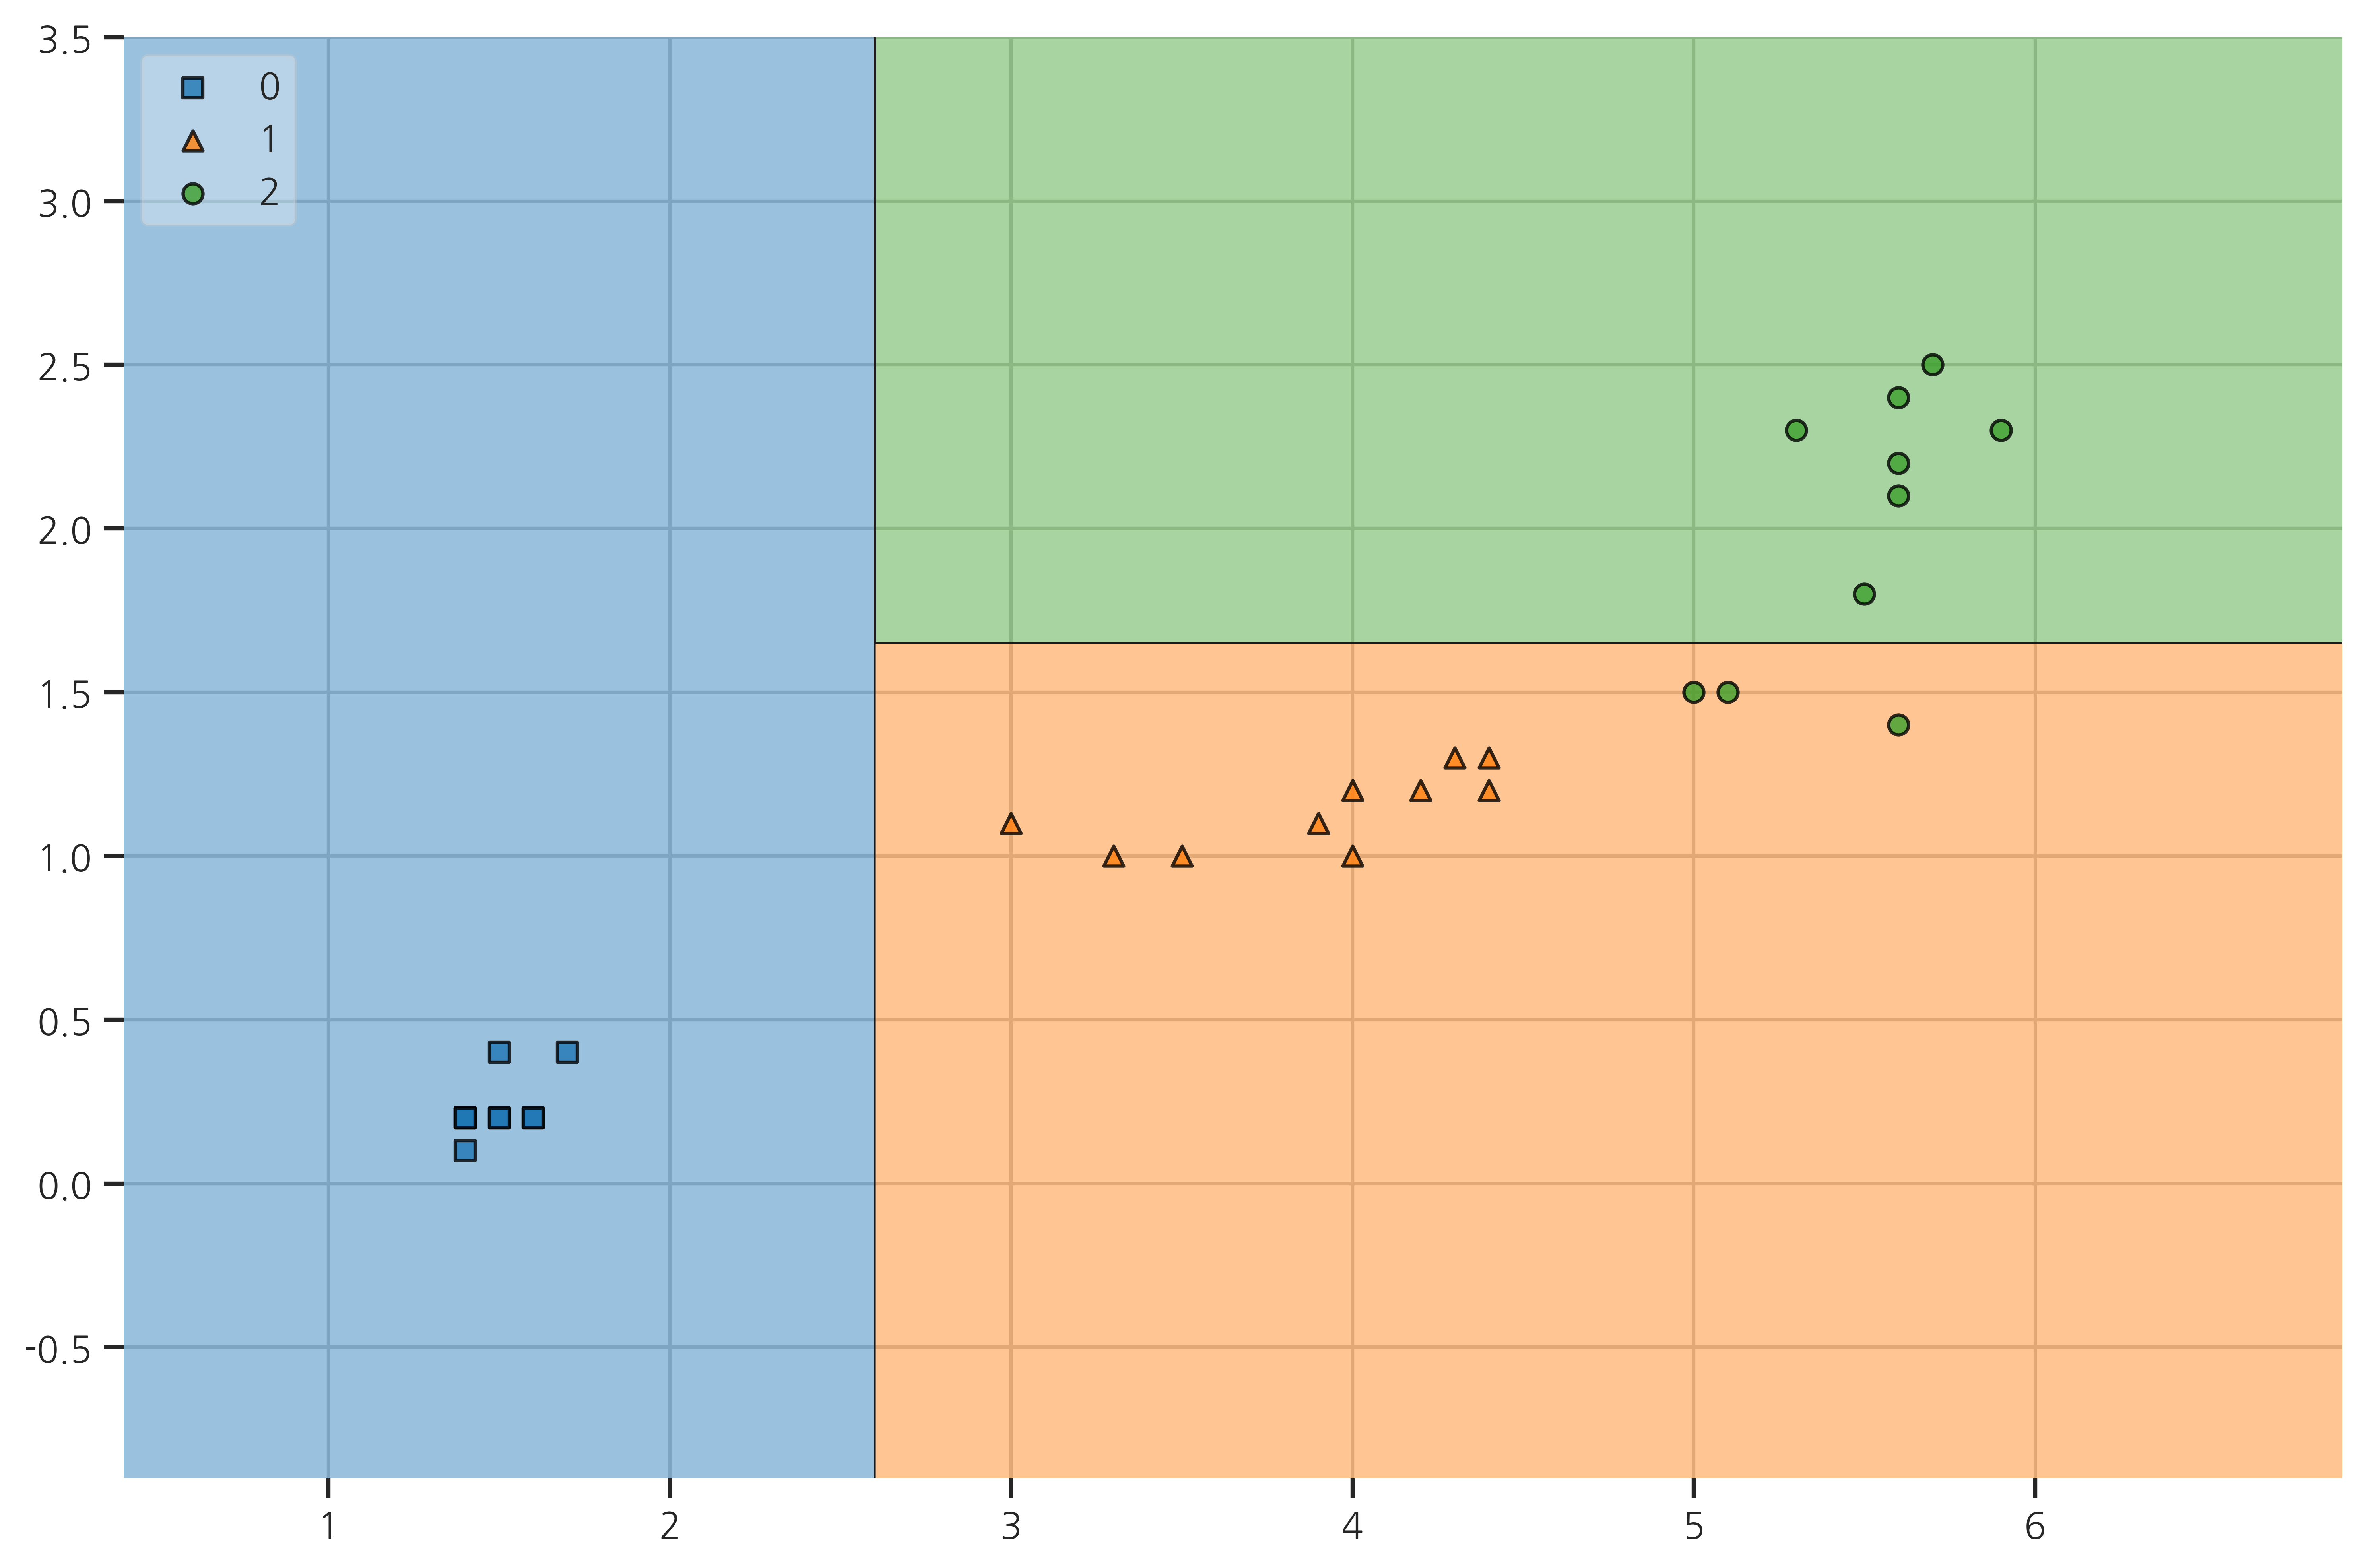

In [10]:
plt.figure(figsize=(12,8))
plot_decision_regions(X=X_test, y=y_test, clf=iris_tree, legend=2)
plt.show()

전체 데이터에서 관찰해보기:  `X_highlight=x_test` 속성 값을 넣어 x_test 값들을 강조해줌

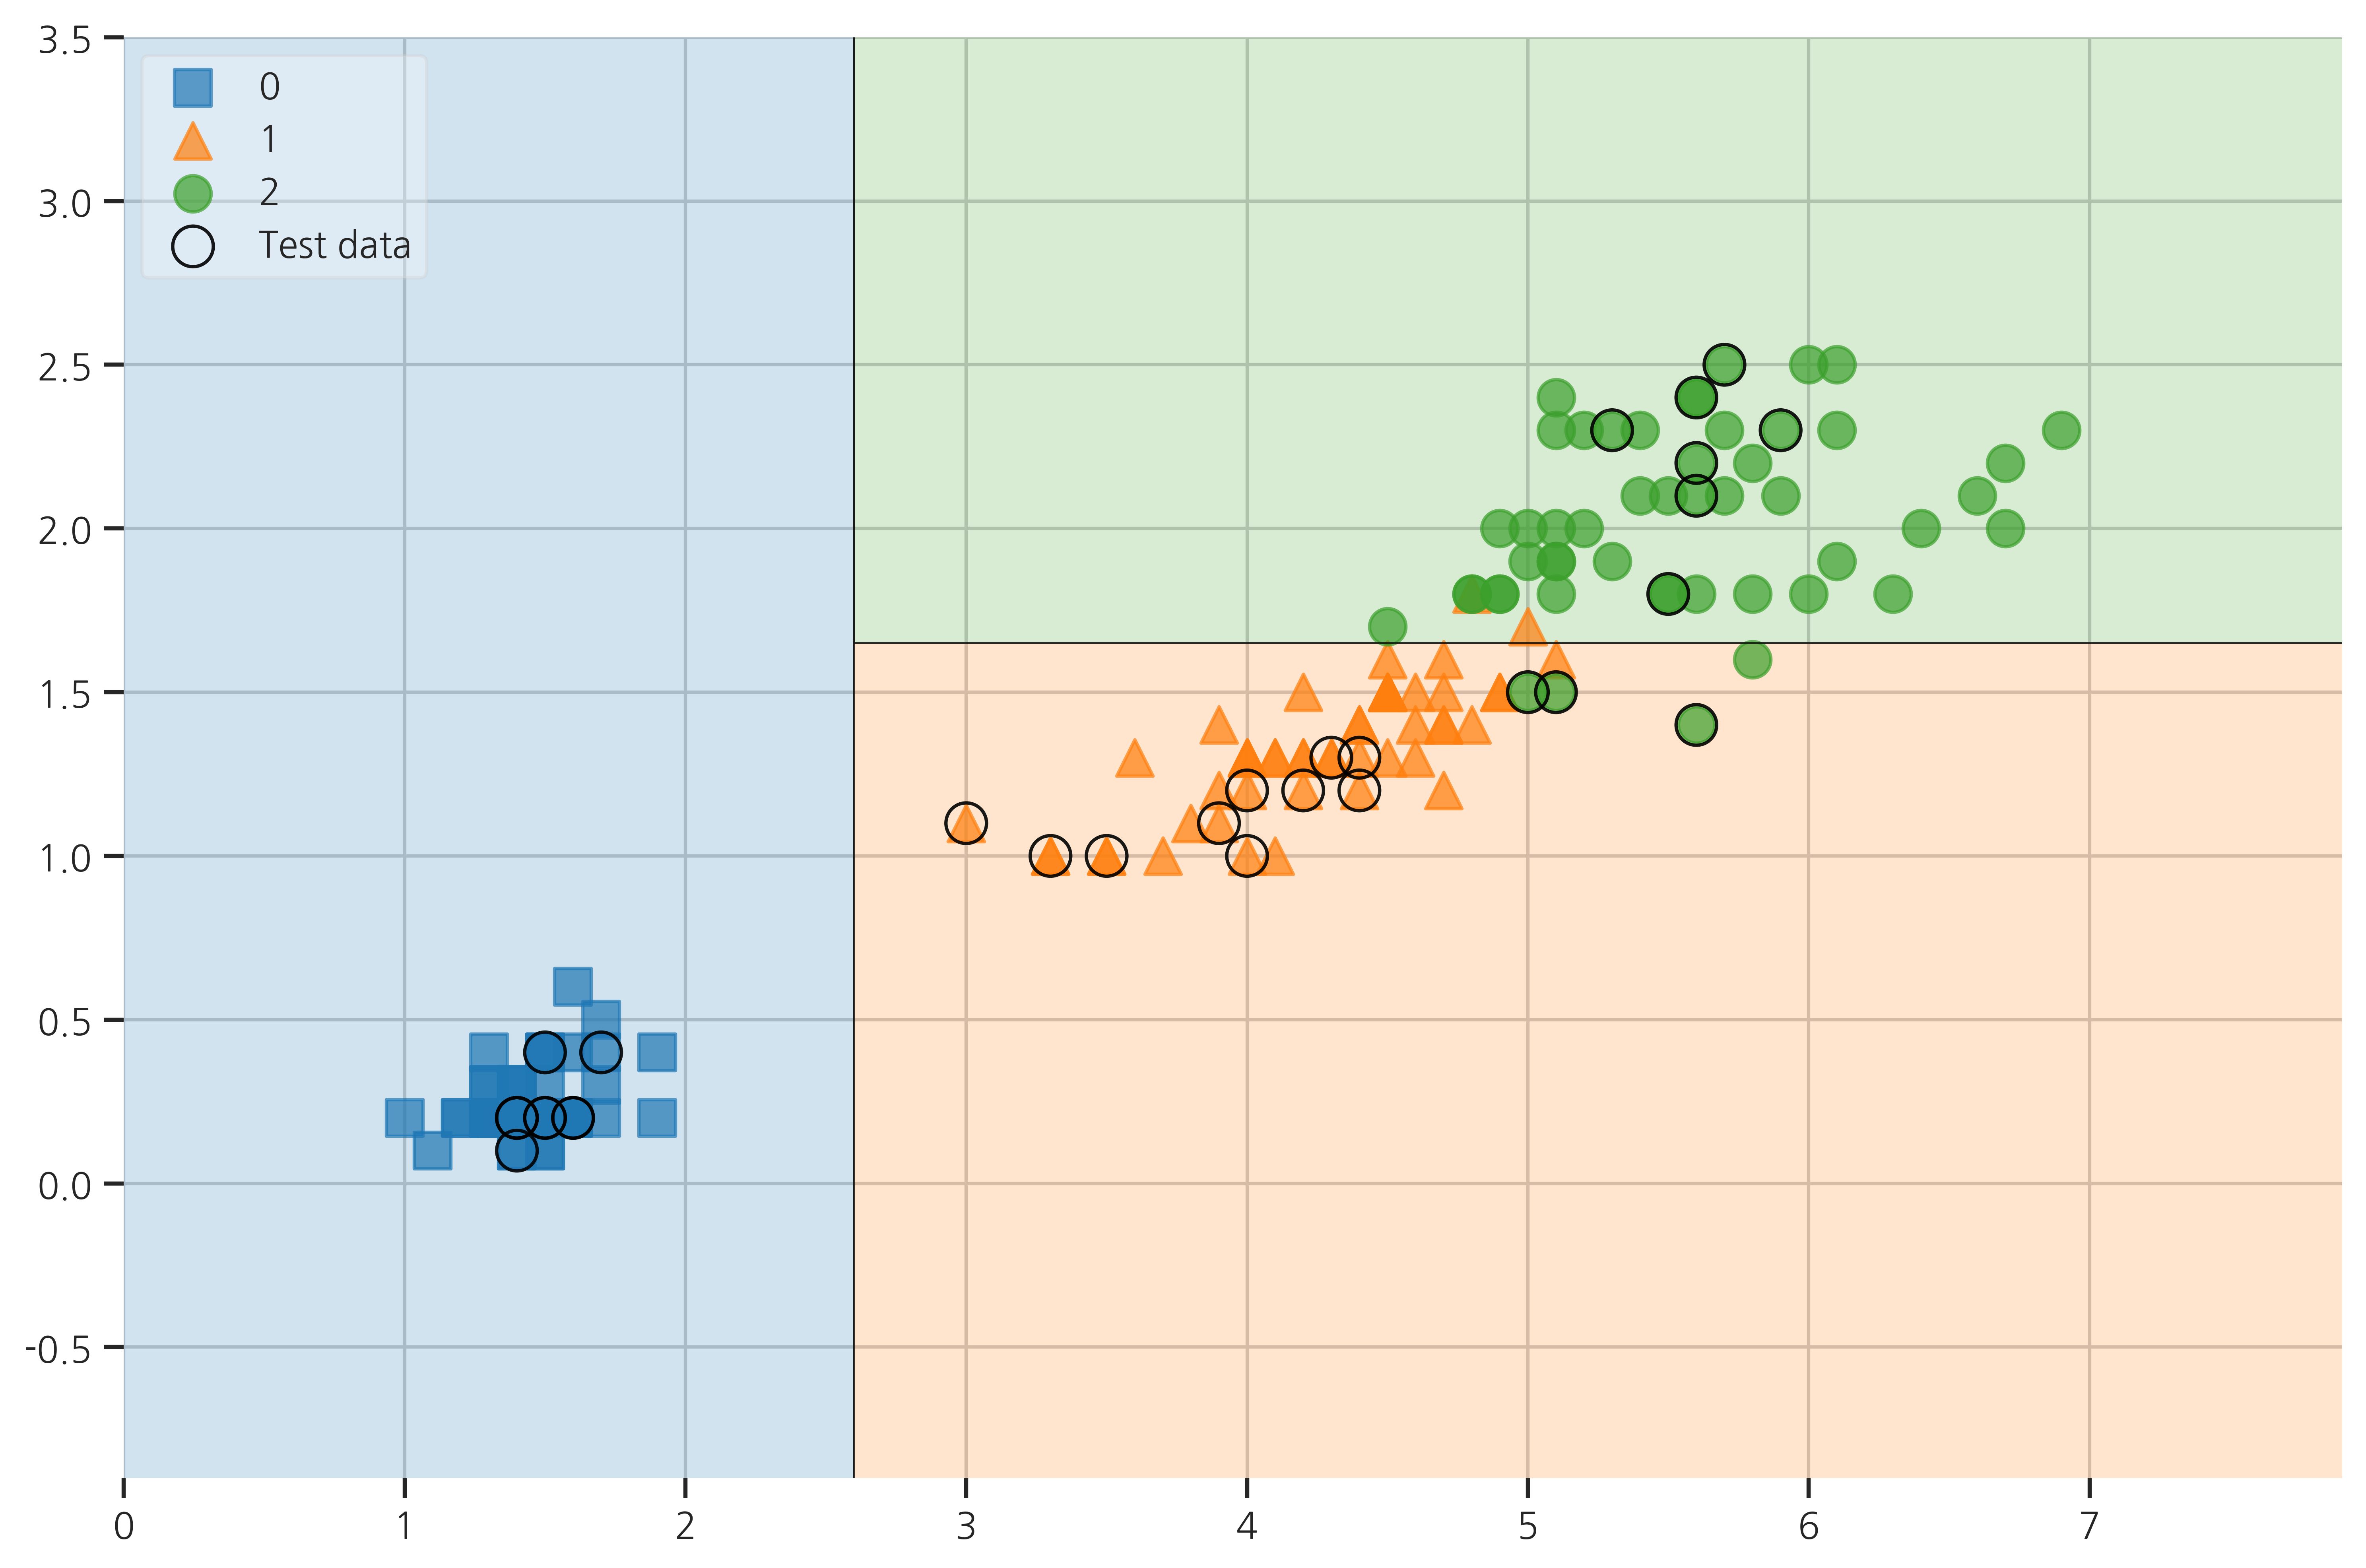

In [11]:
scatter_highlight_kwargs = {'s': 150, 'label': 'Test data', 'alpha': 0.9}
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}

plt.figure(figsize=(12, 8))
plot_decision_regions(X=features, y=labels, X_highlight=X_test, clf=iris_tree, legend=2, scatter_highlight_kwargs=scatter_highlight_kwargs, scatter_kwargs=scatter_kwargs, contourf_kwargs={'alpha': 0.2})
plt.show()

#### 데이터 분리(모든 features 사용)

In [12]:
iris = load_iris()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, stratify=labels, random_state=15)
iris_tree = DecisionTreeClassifier(max_depth=2, random_state=15)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

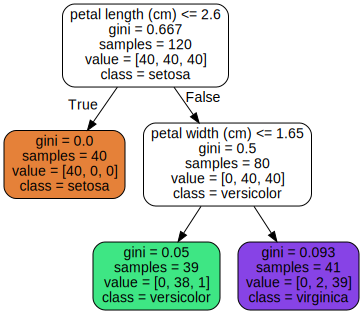

In [14]:
Source(export_graphviz(iris_tree, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True, filled=True))

train data

In [15]:
y_pred_train = iris_tree.predict(X_train)
print('accuracy(train) - ', accuracy_score(y_train, y_pred_train))

accuracy(train) -  0.975


test data

In [16]:
y_pred_test = iris_tree.predict(X_test)
print('accuracy(test) - ', accuracy_score(y_test, y_pred_test))

accuracy(test) -  0.9


모델 사용하기

In [17]:
test_data = [[4.3, 2., 1.2, 1.0]]
iris_tree.predict_proba(test_data)

array([[1., 0., 0.]])

In [18]:
iris.target_names[iris_tree.predict(test_data)]

array(['setosa'], dtype='<U10')

In [19]:
# 주요 특성 확인
iris_tree.feature_importances_

array([0.        , 0.        , 0.53874663, 0.46125337])

In [20]:
iris_clf_model = dict(zip(iris.feature_names, iris_tree.feature_importances_))
iris_clf_model

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.5387466307277629,
 'petal width (cm)': 0.46125336927223715}